__Notes:__ https://github.com/KoustubhPK/studyboard/blob/main/notes/outliers/isolation-forest-(anomalies-detection).pdf

# __Isolation Forest__

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

### __1. Creating Sample Dataset__

In [2]:
data = np.array([
    [20,  6, 13],
    [15, 17, 12],
    [ 9, 12,  7]
])

### __2. Load Dataset__

In [3]:
df = pd.DataFrame(data, columns=["x1", "x2", "x3"])
df

,x1,x2,x3
0,20,6,13
1,15,17,12
2,9,12,7


### __3. Fit Isolation Forest__

In [4]:
isolation_forest = IsolationForest(
    n_estimators=5,
    contamination= "auto",          # number of isolation trees
    random_state=2                  # automatically detect proportion of outliers
)

isolation_forest.fit(df)

IsolationForest(n_estimators=5, random_state=2)

### __4. Predict the Anomalies__

In [5]:
pred = isolation_forest.predict(df)
pred

array([-1,  1,  1])

### __5. Get Anomaly Score__

In [6]:
scores = isolation_forest.decision_function(df)
scores

array([-0.00212643,  0.18278396,  0.14418879])

### __6. Creating DataFrame with its Flagged Results__

In [7]:
df_results = df.copy()
df_results["score"] = scores
df_results["label"] = pred

df_results

,x1,x2,x3,score,label
0,20,6,13,-0.002126,-1
1,15,17,12,0.182784,1
2,9,12,7,0.144189,1


### __7. Separate normal and outliers flag__

In [8]:
normal = df_results[df_results["label"] == 1]
outlier = df_results[df_results["label"] == -1]

### __8. Visualization with normal & flagged points__

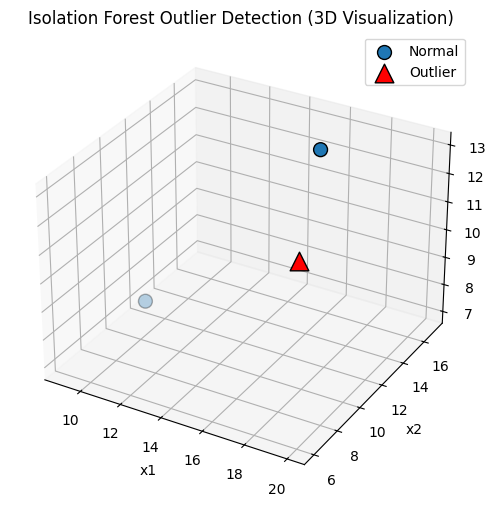

In [9]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_subplot(111, projection='3d')

# plot normal points
axis.scatter(
    normal["x1"], normal["x2"], normal["x3"],
    s=100, marker='o', label='Normal', edgecolor='black'
)

# plot outlier points (in red)
axis.scatter(
    outlier["x1"], outlier["x2"], outlier["x3"],
    s=180, marker='^', color='red', label='Outlier', edgecolor='black'
)

axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.set_zlabel("x3")
axis.set_title("Isolation Forest Outlier Detection (3D Visualization)")
axis.legend()

plt.show()